In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully")

Libraries imported successfully


In [2]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)

df.to_csv('../data/heart_disease.csv', index=False)
print("data saved to Heart_disease_proj/data/heart_disease.csv")

print(f"\n Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Target column: 'num' (0 = no disease, 1+ = disease)")

print("\nFirst 3 rows:")
print(df.head(3))

print(f"\n File saved successfully!")

data saved to Heart_disease_proj/data/heart_disease.csv

 Dataset Info:
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Target column: 'num' (0 = no disease, 1+ = disease)

First 3 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  

 File saved successfully!


In [3]:
print(f"Missing values:\n{df.isnull().sum()}")


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [4]:
df = df.dropna()

In [5]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
scaler = StandardScaler()
feature_cols = df.columns[:-1] 
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])

In [7]:
df_scaled.to_csv('../data/heart_disease_preprocessed.csv', index=False)
print("Data preprocessing complete!")

Data preprocessing complete!


Text(0.5, 1.0, 'Correlation Matrix')

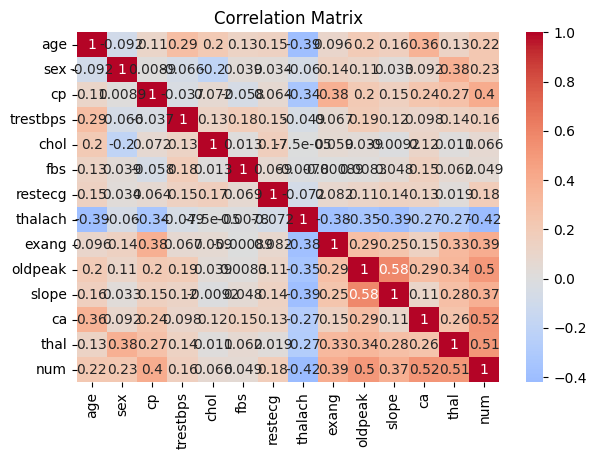

In [8]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Target Distribution')

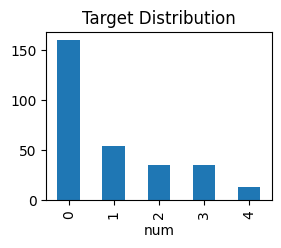

In [9]:
plt.subplot(2, 2, 2)
df.iloc[:, -1].value_counts().plot(kind='bar')
plt.title('Target Distribution')

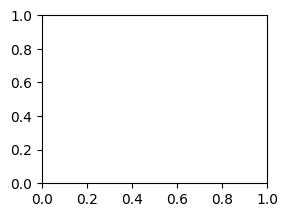

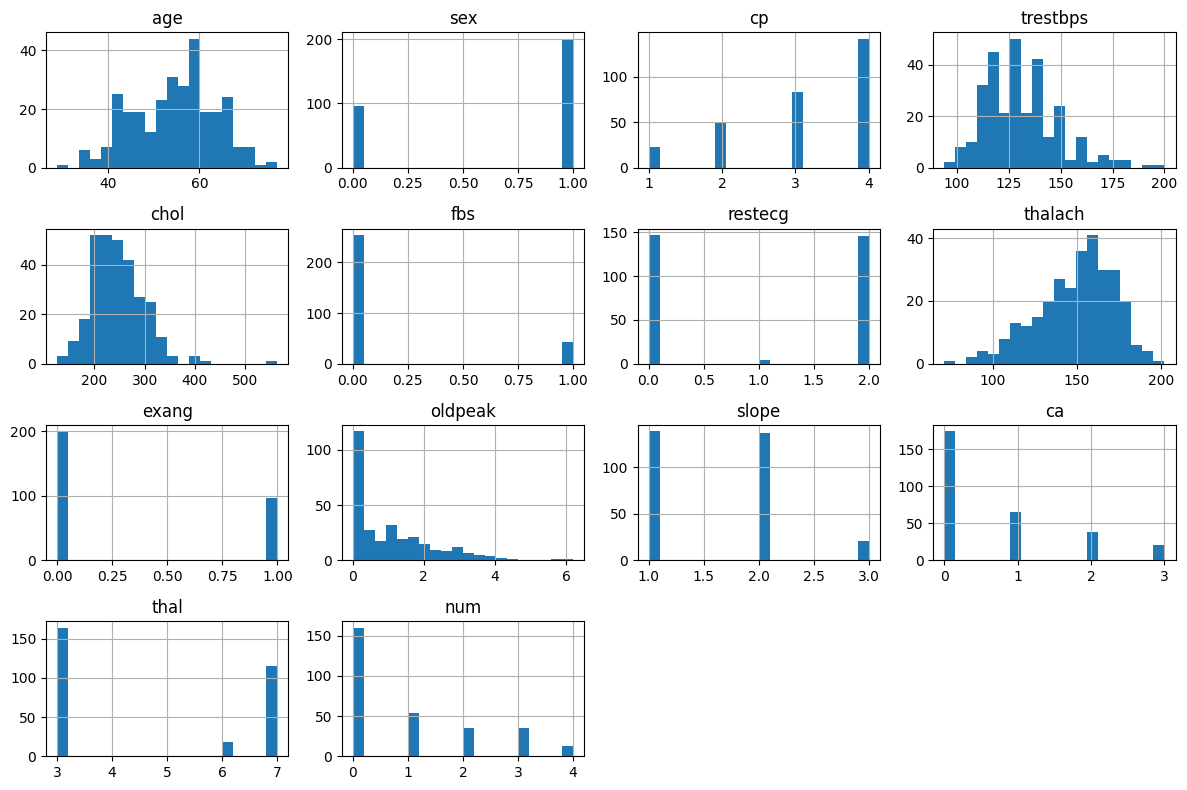

In [10]:
plt.subplot(2, 2, 3)
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()